In [1]:
%load_ext autoreload
%autoreload 2

import sys

import pandas as pd

from bm_tools.data import Data
from bm_tools.plots import Plots
from bm_tools.stats import Stats

import matplotlib.pyplot as plt

# get data
data_obj = Data()
data_obj.add_anndata(pd.read_pickle("./../rna_prot_dataset.pkl"))
data_obj.add_metadata(pd.read_pickle("./../rna_prot_sample_metadata.pkl"), 0)
data_obj.add_metadata(pd.read_pickle("./../rna_prot_feature_metadata.pkl"), 1)


### [F07] Sample-sample correlation heatmap for proteomics and transcriptomics

Sample-Sample correlation heatmaps with corresponding labels. First with Transcriptomics & Proteomics together, then separate, resulting in three heatmaps.

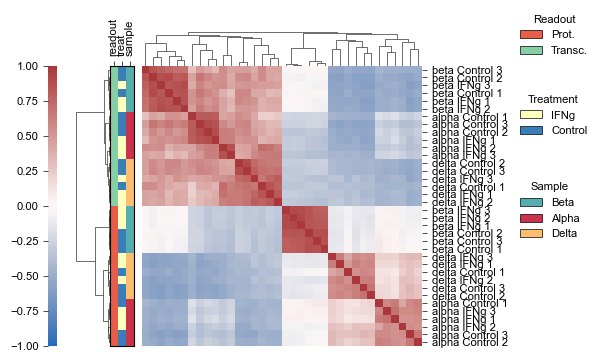

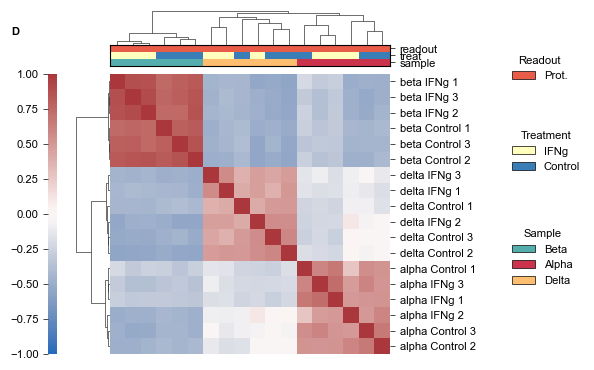

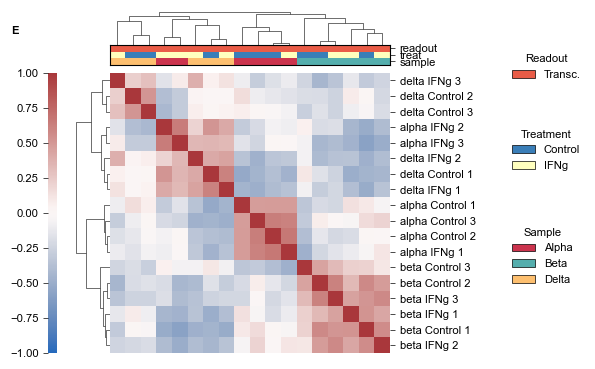

In [2]:
# sample - sample correlation heatmap
data = data_obj.get_data().copy()

# impute data with gaussian to avoid nans
data_imputed = Stats.impute_gaussian(data)
# data_imputed = Stats.impute_median(data)

# standardize data features
data_imputed_scaled = Stats.scale_and_center(data_imputed)

# compute correlation matrix of rows
sample_cm = data_imputed_scaled.T.corr(method = 'pearson')

# label parsing dict and function
label_parse_dict = {
    'readout:' : 'Readout',
    'treat:' : 'Treatment',
    'sample:' : 'Sample',
    'proteomics' : 'Prot.',
    'transcriptomics' : 'Transc.',
    'ifng' : 'IFNg',
    'control' : 'Control',
    'alpha' : 'Alpha',
    'beta' : 'Beta',
    'delta' : 'Delta',
}

def label_parse_regex(l):
    l = l.replace('_', ' ')
    l = l.replace('control', 'Control')
    l = l.replace('ifng', 'IFNg')
    l = l.replace('proteomics', '')
    l = l.replace('transcriptomics', '')

    return l

# -----------------------------------

# make heatmap 
p = Plots()
hm, x_linkage, y_linkage = p.annotated_heatmap(
    data = sample_cm,
    sample_metadata = data_obj.get_metadata(0),
    feature_metadata = data_obj.get_metadata(0),
    colorbars_y = ['readout', 'treat', 'sample'],
    cluster_across_x = True,
    cluster_across_y = True,
    show_dendrogram_y = True,
    show_dendrogram_x = True,
    show_xlabels = False,
    show_ylabels = True,
    legends_position = 'right',
    label_parse_dict = label_parse_dict,
    label_parse_regex = label_parse_regex,
)

# save plot
p.save_figure(
    fig = hm.figure,
    filename = "figure_07_sample_sample_correlation_heatmap.svg",
    output_dir = "./assets/20250423_revision_figures/",
    dpi = 300,
    # width_mm = 93,
    # height_mm = 60,
    nature_width = "single",
    nature_height = "single",
)

# -----------------------------------

# make heatmap of proteomics data
data_p = data_obj.copy()
data_p.filter_by_metadata({"readout" : ["proteomics"]}, axis = 0)
data = data_p.get_data()
data_imputed = Stats.impute_gaussian(data)
data_imputed_scaled = Stats.scale_and_center(data_imputed)
sample_cm = data_imputed_scaled.T.corr(method = 'pearson')

p = Plots()
hm, x_linkage, y_linkage = p.annotated_heatmap(
    data = sample_cm,
    sample_metadata = data_p.get_metadata(0),
    feature_metadata = data_p.get_metadata(0),
    colorbars_x = ['readout', 'treat', 'sample'],
    cluster_across_x = True,
    cluster_across_y = True,
    show_dendrogram_y = True,
    show_dendrogram_x = True,
    show_xlabels = False,
    show_ylabels = True,
    legends_position = 'right',
    legend_right_offset = .32,
    legend_right_lineheight = 0.05,
    legend_right_headspace = 0.05,
    label_parse_dict = label_parse_dict,
    label_parse_regex = label_parse_regex,
    annotated_rows = True,
    enumerate_plot = "D",
)

# save plot
p.save_figure(
    fig = hm.figure,
    filename = "figure_07_sample_sample_correlation_heatmap_proteomics.svg",
    output_dir = "./assets/20250423_revision_figures/",
    dpi = 300,
    # width_mm = 50,
    # height_mm = 50,
    nature_width = "single",
    nature_height = "single",
)

# -----------------------------------

# make heatmap of transcriptomics data
data_t = data_obj.copy()
data_t.filter_by_metadata({"readout" : ["transcriptomics"]}, axis = 0)
data = data_t.get_data()
data_imputed = Stats.impute_gaussian(data)
data_imputed_scaled = Stats.scale_and_center(data_imputed)
sample_cm = data_imputed_scaled.T.corr(method = 'pearson')

p = Plots()
hm, x_linkage, y_linkage = p.annotated_heatmap(
    data = sample_cm,
    sample_metadata = data_t.get_metadata(0),
    feature_metadata = data_t.get_metadata(0),
    colorbars_x = ['readout', 'treat', 'sample'],
    cluster_across_x = True,
    cluster_across_y = True,
    show_dendrogram_y = True,
    show_dendrogram_x = True,
    show_xlabels = False,
    show_ylabels = True,
    legends_position = 'right',
    legend_right_offset = .32,
    legend_right_lineheight = 0.05,
    legend_right_headspace = 0.05,
    label_parse_dict = label_parse_dict,
    label_parse_regex = label_parse_regex,
    annotated_rows = True,
    enumerate_plot = "E",
)

p.save_figure(
    fig = hm.figure,
    filename = "figure_07_sample_sample_correlation_heatmap_transcriptomics.svg",
    output_dir = "./assets/20250423_revision_figures/",
    dpi = 300,
    # width_mm = 50,
    # height_mm = 50,
    nature_width = "single",
    nature_height = "single",
)
